# Uczenie nienadzorowane

Do tej pory zajmowaliśmy się uczeniem nadzorowanym (ang. *supervised*), tj. takimi przypadkami, gdy zbiór trenujący składał się z dwóch zmiennych `X` i `y`, a naszym zadaniem było przewidzenia `y` na podstawie danych z `X`. Ponadto poznaliśmy odpowiednie metryki, które pozwalały nam zmierzyć jak dobrze (lub) źle działają modele, które wytrenowaliśmy.

Przypomnijmy, że na uczenie maszynowe składają się trzy paradygmaty:
 * supervised learning
 * unsupervised learning
 * reinforcement learning
 
Dzisiejsze zajęcia są poświęcone drugiemu paradygmatowi, czyli uczeniu nienadzorowanym, a dokładniej automatycznemu klastrowaniu. Do klastrowania służą m.in. następujące algorytmy:
 * K-średnich (ang. *k-means*)
 * [DB-SCAN](https://en.wikipedia.org/wiki/DBSCAN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Zadanie 0**: wczytaj do zmiennej `points` zbiór danych z pliku `points.csv`. Uwaga: kolumny są rozdzielone spacją. Plik nie zawiera nagłówka.

In [2]:
points = pd.read_csv('points.csv', sep=' ', header = None)

In [3]:
points.head()

,0,1
0,1010.495494,-289.962213
1,1033.563060,-351.183595
2,615.425717,-244.211364
3,942.222194,-245.390831
4,1645.832191,-80.709377


In [4]:
points.describe()

,0,1
count,1200.000000,1200.000000
mean,75.237773,-175.542581
std,929.878586,419.815724
min,-1045.524369,-977.397408
25%,-832.377477,-474.994279
50%,-75.089840,-260.627020
75%,964.912212,-2.639524
max,2100.238837,1117.317473


In [5]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1200 non-null   float64
 1   1       1200 non-null   float64
dtypes: float64(2)
memory usage: 18.9 KB


Narysujmy wykres z wyżej wczytanych punktów.

<AxesSubplot:xlabel='0', ylabel='1'>

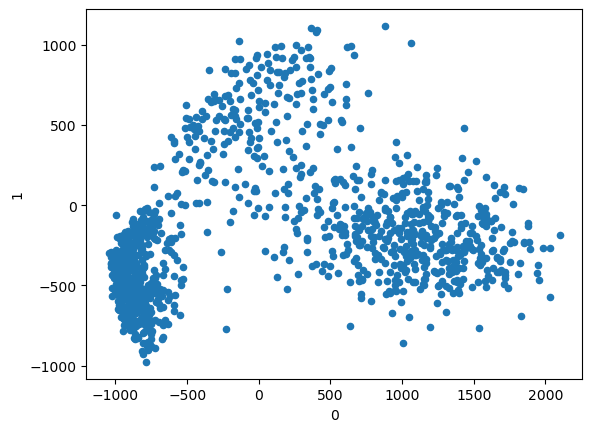

In [6]:
xs = points[0]
ys = points[1]

points.plot(kind = 'scatter', x = 0, y = 1)

**zadanie 1** Ile dostrzegasz rozdzielnych grup punktów na powyższym wykresie?

In [7]:
# 3 grupy punktów

Podstawowym akgorytmem do klastrowania danych jest $k$-średnich albo k-means, który został omówiony na wykładzie.  Oczywiście biblioteka `sklearn` zawiera implementację tego algorytmu.

**zadanie 2** Wczytaj z biblioteki `sklearn.cluster` klasę `KMeans`.

In [8]:
from sklearn.cluster import KMeans

Algorytm k-means  wymaga podania oczekiwanej liczby klas, dlatego podczas tworzenia obiektu `KMeans` musimy podać parametr `n_clusters`. W poniższym przykładzie ustawiamy powyższy parametr na 3.

In [9]:
kmeans = KMeans(n_clusters = 3)

**zadanie 3** Wywołaj metodę `fit` na obiekcie `kmeans` i jako parametr przekaż zmienną `points`. W taki sposób wytrenujesz model.

In [10]:
kmeans.fit(points)

KMeans(n_clusters=3)

**zadanie 4** Mając wytrenowany model k-średnich, możemy wyznaczyć klaster, do którego został przydzielony każdy z punktów. Służy do tego komenda *predict*. Wywołaj tę komendę na zmiennej *points* i zapisz wynik do zmiennej *clusters*.

In [11]:
clusters = kmeans.predict(points)

Wyświetlmy, w jaki sposób model podzielił punkty:

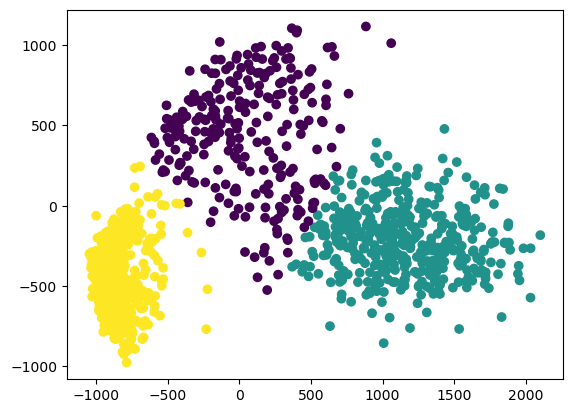

In [12]:
plt.scatter(x = points[0], y = points[1], c = clusters)
plt.show()

Informacje o centroidach są przechowywwane w atrybucie `cluster_centers_`:

In [13]:
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print("Claster ID: {}\tX: {}\tY:{}".format(idx, centroid[0], centroid[1]))

Claster ID: 0	X: 60.61234354820599	Y:444.8494302023744
Claster ID: 1	X: 1158.9296227871432	Y:-212.2805521175457
Claster ID: 2	X: -844.3076877296984	Y:-450.07153180895216


**zadanie 5** Sprawdź, w jaki sposób podzieli zbiór punktów model k-średnich, jeżeli ustawimy liczbę klastrów na 2 i 4.

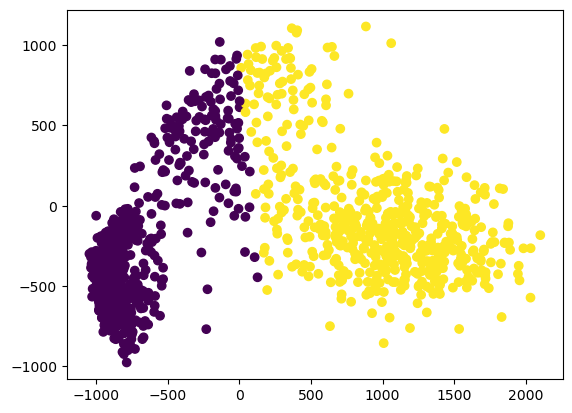

In [14]:
# 2 klastry
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(points)
clusters2 = kmeans2.predict(points)
plt.scatter(x = points[0], y = points[1], c = clusters2)
plt.show()

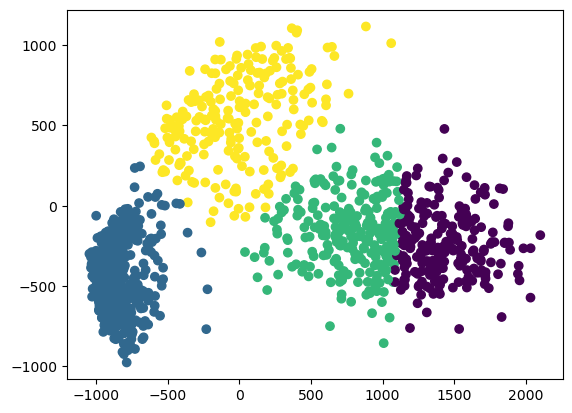

In [15]:
# 4 klastry
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(points)
clusters4 = kmeans4.predict(points)
plt.scatter(x = points[0], y = points[1], c = clusters4)
plt.show()

Algorytm k-średnich minimalizuje sumę odległości do najbliżsego centroidu, co możemy traktować jako funkcje kosztu i wykorzystać to porównania pomiędzy modelami z różnymi liczbami klastrów.

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


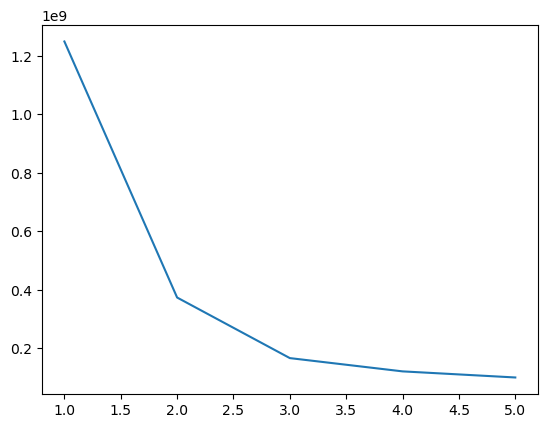

In [16]:
n_clusters = [1, 2, 3, 4, 5]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters = n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

Powyższy wykres przedstawia zależność pomiędzy liczbą klastrów, a funkcją kosztu. Można łatwo zauważyć, powyżej 3 klastrów zależność na wygładza się. Stąd, liczba 3 wydaje się być najlepszym wyborem.

Drugim popularnym algorytmem jest DB-SCAN, który nie wymaga `a priori` podania liczby klastrów, którą sam ją wyznacza. Ponadto, cechą tego modelu jest możliwość pominięcia niektórych punktów, które są oddalone od skupisk.

In [17]:
from sklearn.cluster import DBSCAN

Model DB-SCAN przyjmuje dwa parametry: eps - odległość pomiędzy punktami i minimalną liczbę punktów potrzebną do utworzenia klastra.

In [18]:
db = DBSCAN(eps = 130, min_samples = 10)
labels = db.fit_predict(points)
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

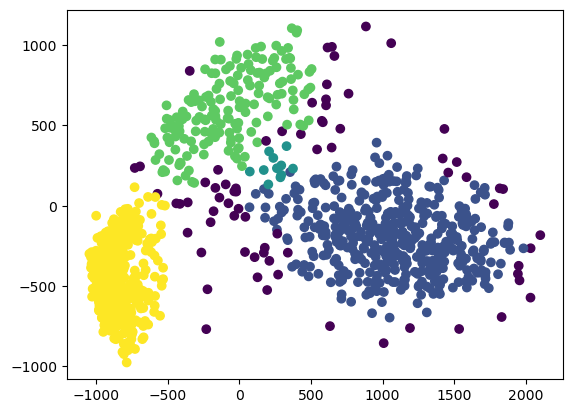

In [19]:
plt.scatter(x = points[0], y = points[1], c = labels)
plt.show()

**zadanie 6** Przeskaluj dane, tak aby miały rozkład standardowy (średnia = 0 , std = 1). I uruchom model SB-SCAN i k-średnich. Czy normalizacja zmieniła coś?

In [20]:
# Dane przed skalowaniem
points.describe()

,0,1
count,1200.000000,1200.000000
mean,75.237773,-175.542581
std,929.878586,419.815724
min,-1045.524369,-977.397408
25%,-832.377477,-474.994279
50%,-75.089840,-260.627020
75%,964.912212,-2.639524
max,2100.238837,1117.317473


In [21]:
from sklearn.preprocessing import StandardScaler

# Skalowanie:
scaler = StandardScaler()
scaler.fit(points)
points_scaled = scaler.transform(points)

# Zamiana na df:
points_scaled = pd.DataFrame(points_scaled)

In [22]:
# Dane po skalowaniu
points_scaled.describe()

,0,1
count,1.200000e+03,1.200000e+03
mean,6.999031e-17,2.011354e-16
std,1.000417e+00,1.000417e+00
min,-1.205780e+00,-1.910813e+00
25%,-9.764647e-01,-7.135906e-01
50%,-1.617311e-01,-2.027554e-01
75%,9.571630e-01,4.120264e-01
max,2.178613e+00,3.080873e+00


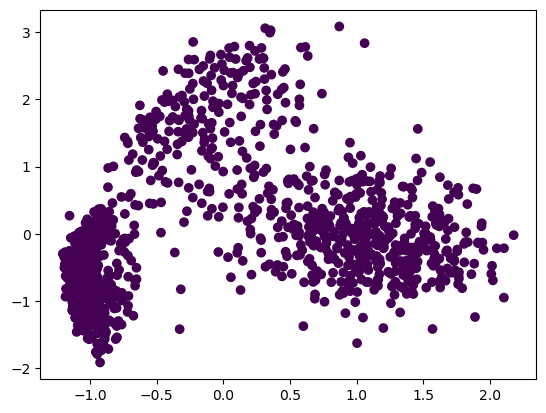

In [23]:
# DBSCAN dla początkowych parametrów >> jeden klaster
db = DBSCAN(eps = 130, min_samples = 10)
labels_scaled = db.fit_predict(points_scaled)
plt.scatter(x = points_scaled[0], y = points_scaled[1], c = labels_scaled)
plt.show()

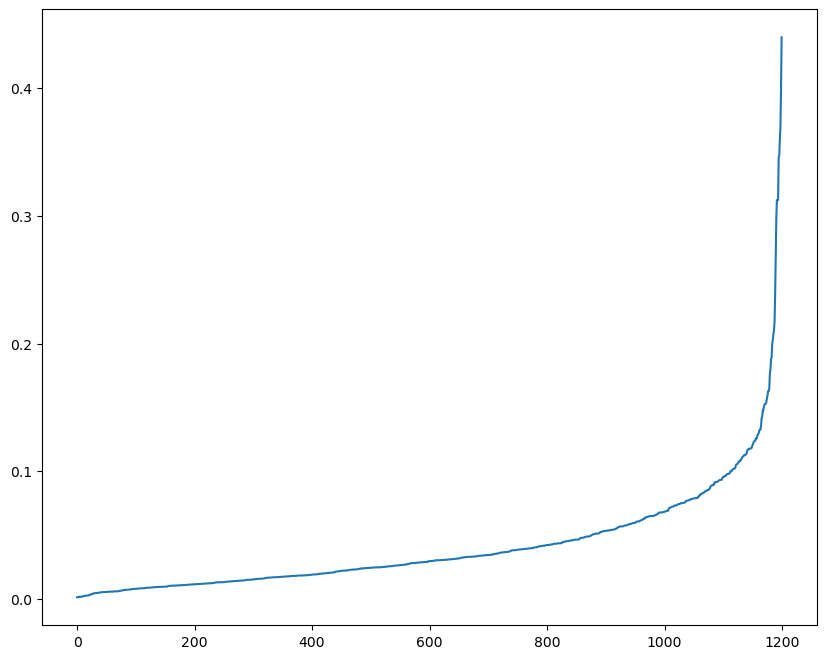

In [24]:
# metoda NearestNeighbors, żeby znaleźć optymalną wartość eps i min_samples dla przeskalowanych danych:
# żródło: https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan

from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors = 21).fit(points_scaled)
distances, indices = nn.kneighbors(points_scaled)

import numpy as np

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

# optymalny zakres eps: 0.05 - 0.3 ('elbow chart')

In [25]:
min_samples = range(5,25)
eps = np.arange(0.1, 0.3, 0.01) 

In [26]:
from sklearn.metrics import silhouette_score

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(points_scaled).labels_
        score = silhouette_score(points_scaled, labels)
        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5730314689424095
min_samples: 17
eps: 0.2899999999999999


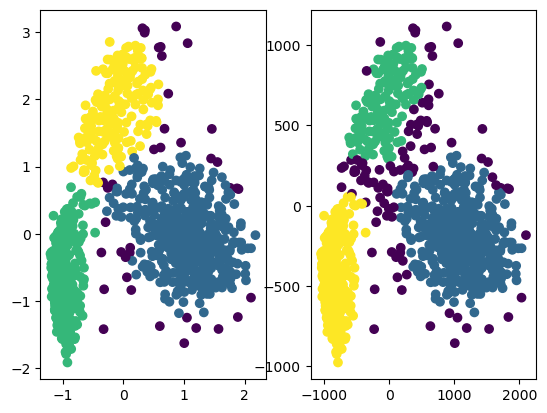

In [27]:
# DBSCAN dla eps = 0.29 i min_samples = 17
db = DBSCAN(eps = 0.29, min_samples = 17)
labels_scaled = db.fit_predict(points_scaled)


fig, (plt1, plt2) = plt.subplots(1,2)

# Wykres 1 - przeskalowane dane
plt1.scatter(x = points_scaled[0], y = points_scaled[1], c = labels_scaled)
# Wykres 2 - dane bez skalowania
plt2.scatter(x = points[0], y = points[1], c = labels)

plt.show()

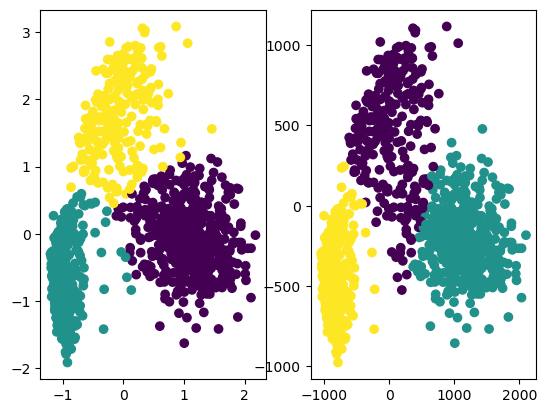

In [28]:
# k-means dla przeskalowanych danych
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(points_scaled)
clusters3 = kmeans3.predict(points_scaled)


fig, (plt1, plt2) = plt.subplots(1,2)

# Wykres 1 - przeskalowane dane
plt1.scatter(x = points_scaled[0], y = points_scaled[1], c = clusters3)
# Wykres 2 - dane bez skalowania
plt2.scatter(x = points[0], y = points[1], c = clusters)

plt.show()

### Redukcja wymiaru

Jedną z wad algorytmu k-średnich jest czas trenowania, który rośnie z wymiarem danych, jak ich z liczbą przykładów trenujących. Podstawową techniką w takim przypadku jest zmniejszenie wymiarowości danych. Najprostszą techniką jest [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [29]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

Ściągnijmy zbiór dancych MNIST, który pojawił się na naszych zajęciach.

In [30]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
y = mnist.target

Podczas tworzeania PCA, możemy podać wyjsciową liczbę wymiarów (argument *n_components*). 

In [31]:
pca = PCA(n_components = 10)
pca.fit(X)

PCA(n_components=10)

In [32]:
mnist_pca = pca.transform(X)

**zadanie 7** Wytrenuj K-Means na wyjściu z PCA. Ustaw liczbę klastrów na 10. Ponadto zapisz do `mnist_clusters` numer klastra, do którego został on przydzielony.

In [33]:
kmeans10 = KMeans(n_clusters = 10)
kmeans10.fit(mnist_pca)
mnist_clusters = kmeans10.predict(mnist_pca)

In [34]:
mnist_clusters

array([9, 8, 5, ..., 6, 3, 7])

**zadanie 8** Zmienna `y` zawiera informację o prawidłowych oznaczeniach: tj. liczby od 0 do 9 (włącznie). Dla każdej cyfry *i* znajdz klaster *j*, w którym znajduje się najwięcej cyfr *i*.

In [35]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [37]:
# Zamiana wartości w mnist_cluster na kategorie (żeby pasowało do kategorii w y [str])
import numpy as np
str_mnist_clusters = np.array([str(i) for i in mnist_clusters])

str_mnist_clusters

array(['9', '8', '5', ..., '6', '3', '7'], dtype='<U1')

In [38]:
# Confussion matrix > który klaster został najczęściej wybrany dla danej liczby (etykieta z y)
from sklearn.metrics import confusion_matrix

cnf_mtrx_array = confusion_matrix(y, str_mnist_clusters)
cnf_mtrx_array

array([[  20,   28, 3556,   22,  218,   42,    9,  193, 2672,  143],
       [   8, 4270,    0, 3565,    6,    4,    7,    6,    0,   11],
       [4748,  627,   30,  318,  411,  204,   73,  260,  151,  168],
       [ 247,  645,   13,  117, 4524,  199,   44,   38,  160, 1154],
       [  37,  306,   16,  372,    0, 3736, 2049,  276,   16,   16],
       [  15,  495,   90,  911, 1893,  455,  307,   84,  542, 1521],
       [ 217,  623,   91,  208,   39,  107,    2, 5332,  186,   71],
       [  54,  616,   20,  296,    4, 2092, 4184,    4,   15,    8],
       [  95,  529,   46,  621, 1183,  214,  267,   68,   63, 3739],
       [  19,  495,   55,  149,   84, 3374, 2646,   15,   26,   95]],
      dtype=int64)

In [39]:
# Zamiana confusion matrix na dataFrame > poziomo numery klastrów, pionowo etykiety z y
conf_mtrx_df = pd.DataFrame(cnf_mtrx_array,
                            columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
conf_mtrx_df

,0,1,2,3,4,5,6,7,8,9
0,20,28,3556,22,218,42,9,193,2672,143
1,8,4270,0,3565,6,4,7,6,0,11
2,4748,627,30,318,411,204,73,260,151,168
3,247,645,13,117,4524,199,44,38,160,1154
4,37,306,16,372,0,3736,2049,276,16,16
5,15,495,90,911,1893,455,307,84,542,1521
6,217,623,91,208,39,107,2,5332,186,71
7,54,616,20,296,4,2092,4184,4,15,8
8,95,529,46,621,1183,214,267,68,63,3739
9,19,495,55,149,84,3374,2646,15,26,95


In [40]:
# Numery klastrów przyporządkowane do etykiet (niektóre klastry są przypisane dwukrotnie:
# liczba 4 jest często mylona z 9, więc obie liczby mają przypisany ten sam klaster
conf_mtrx_df.idxmax(axis = 1)

0    2
1    1
2    0
3    4
4    5
5    4
6    7
7    6
8    9
9    5
dtype: object

**zadanie 9** mając wyznaczone klasy z poprzedniego zadania, sumuj liczbę elementów w najpopularniejszym klastrze.

In [41]:
# Suma elementów dla wszystkich klastrów:
clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
clstrs_elmnts = []

for item in clstrs:
    clstrs_elmnts.append(conf_mtrx_df[item].sum())
    
d = {'Cluster':clstrs, 'Cluster_elements':clstrs_elmnts}

df = pd.DataFrame(d)
df = df.set_index('Cluster')

df.sort_values('Cluster_elements', ascending = False)

,Cluster_elements
Cluster,
5,10427
6,9588
1,8634
4,8362
9,6926
3,6579
7,6276
0,5460
2,3917


In [42]:
# Klaster z największą liczbą elementów:
df.sort_values('Cluster_elements', ascending = False).head(1)

,Cluster_elements
Cluster,
5,10427


**zadanie 10** Oblicz accuracy biorąc wynik z poprzedniego zadania.

In [ ]:
# Przypisujemy etykietę (liczbę) do klastra na podstawie najczęściej wskazanej etykiety,
# następnie liczymy stosunek najczęściej wskazanej klasy do całkowitej liczby elementów w klastrze.

In [44]:
# Accuracy liczona dla każdego klastra:
clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
clstrs_acc = []

conf_mtrx_df['0'].max()

for item in clstrs:
    clstrs_acc.append(conf_mtrx_df[item].max()/conf_mtrx_df[item].sum())
    
d2 = {'Cluster':clstrs, 'Cluster_accuracy':clstrs_acc}

df2 = pd.DataFrame(d2)
df2 = df2.set_index('Cluster')

df2.sort_values('Cluster_accuracy', ascending = False)

,Cluster_accuracy
Cluster,
2,0.907838
0,0.869597
7,0.849586
8,0.697468
3,0.541876
4,0.541019
9,0.539850
1,0.494556
6,0.436379


In [45]:
# Accuracy dla całego zbioru danych:
clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Lista z maksymalnymi wartościami przypisanymi do danej etykiety (per kluster)
clstrs_max = []

for item in clstrs:
    clstrs_max.append(conf_mtrx_df[item].max())

# Accuracy:
sum(clstrs_max)/df['Cluster_elements'].sum()

0.5760857142857143

**zadanie 11** Spróbuj podwyższych wynik, stosując np. normalizację lub zmieniając parametry.

In [46]:
mn_df = pd.DataFrame(mnist_pca)
mn_df.head()

,0,1,2,3,4,5,6,7,8,9
0,122.255260,-316.233700,-51.132528,-556.898614,-49.209627,-217.068082,233.733159,188.975889,-358.707853,203.402623
1,1010.493992,-289.963766,576.121481,-485.083688,-841.478091,-145.468960,-48.354259,-102.216601,34.534738,151.326668
2,-58.995946,393.697452,-161.998219,529.221065,-313.159360,8.970453,-860.984860,374.262079,-78.455415,-192.760922
3,-796.965024,-607.421265,295.522590,109.112065,25.666791,697.859054,-474.512287,-99.626059,298.496402,4.466619
4,-391.318924,729.804183,13.906782,-242.894595,98.773282,35.926360,-87.453641,-415.681591,200.288020,106.047710


In [53]:
# Normalize dataset
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = mn_df.columns
d = scaler.fit_transform(mn_df)
mn_df_norm = pd.DataFrame(d, columns=names)

mn_df_norm.head()

,0,1,2,3,4,5,6,7,8,9
0,0.347289,0.384551,0.474070,0.311366,0.464766,0.407503,0.565922,0.571529,0.281996,0.593901
1,0.603625,0.393631,0.690079,0.334460,0.169841,0.435927,0.447691,0.446961,0.432992,0.568124
2,0.294982,0.629922,0.435891,0.660634,0.366510,0.497236,0.107095,0.650792,0.389606,0.397804
3,0.082011,0.283910,0.593448,0.525538,0.492639,0.770711,0.269076,0.448069,0.534347,0.495430
4,0.199077,0.746089,0.496468,0.412342,0.519853,0.507937,0.431303,0.312864,0.496637,0.545711


In [54]:
kmeans10 = KMeans(n_clusters = 10)
kmeans10.fit(mn_df_norm)
mnist_clusters_norm = kmeans10.predict(mn_df_norm)

mnist_clusters_norm

array([1, 9, 5, ..., 0, 9, 8])

In [55]:
str_mnist_clusters_norm = np.array([str(i) for i in mnist_clusters_norm])
str_mnist_clusters_norm

array(['1', '9', '5', ..., '0', '9', '8'], dtype='<U1')

In [56]:
# Confusion matrix dla znormalizowanych danych
cnf_mtrx_array_norm = confusion_matrix(y, str_mnist_clusters_norm)

conf_mtrx_df_norm = pd.DataFrame(cnf_mtrx_array_norm,
                            columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
conf_mtrx_df_norm

,0,1,2,3,4,5,6,7,8,9
0,8,54,3966,15,301,31,21,13,245,2249
1,9,5,0,9,2,5,4395,3442,8,2
2,66,219,33,4764,267,242,623,336,173,267
3,33,931,7,311,4411,210,552,101,32,553
4,2080,21,18,21,21,3837,199,333,234,60
5,162,1257,61,8,1840,422,421,674,75,1393
6,9,34,108,208,40,122,550,103,4989,713
7,3912,16,27,78,23,2398,551,268,6,14
8,268,4026,26,93,947,124,466,673,83,119
9,2443,188,62,23,94,3598,409,114,10,17


In [57]:
# Accuracy dla całego zbioru danych - dane znormalizowane

clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
clstrs_max_norm = []

for item in clstrs:
    clstrs_max_norm.append(conf_mtrx_df_norm[item].max())

# Accuracy:
sum(clstrs_max_norm)/conf_mtrx_df_norm.sum().sum()

0.5713

**Gratuluję!**